In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
df= pd.read_csv("iris.csv")

In [45]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [47]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [48]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


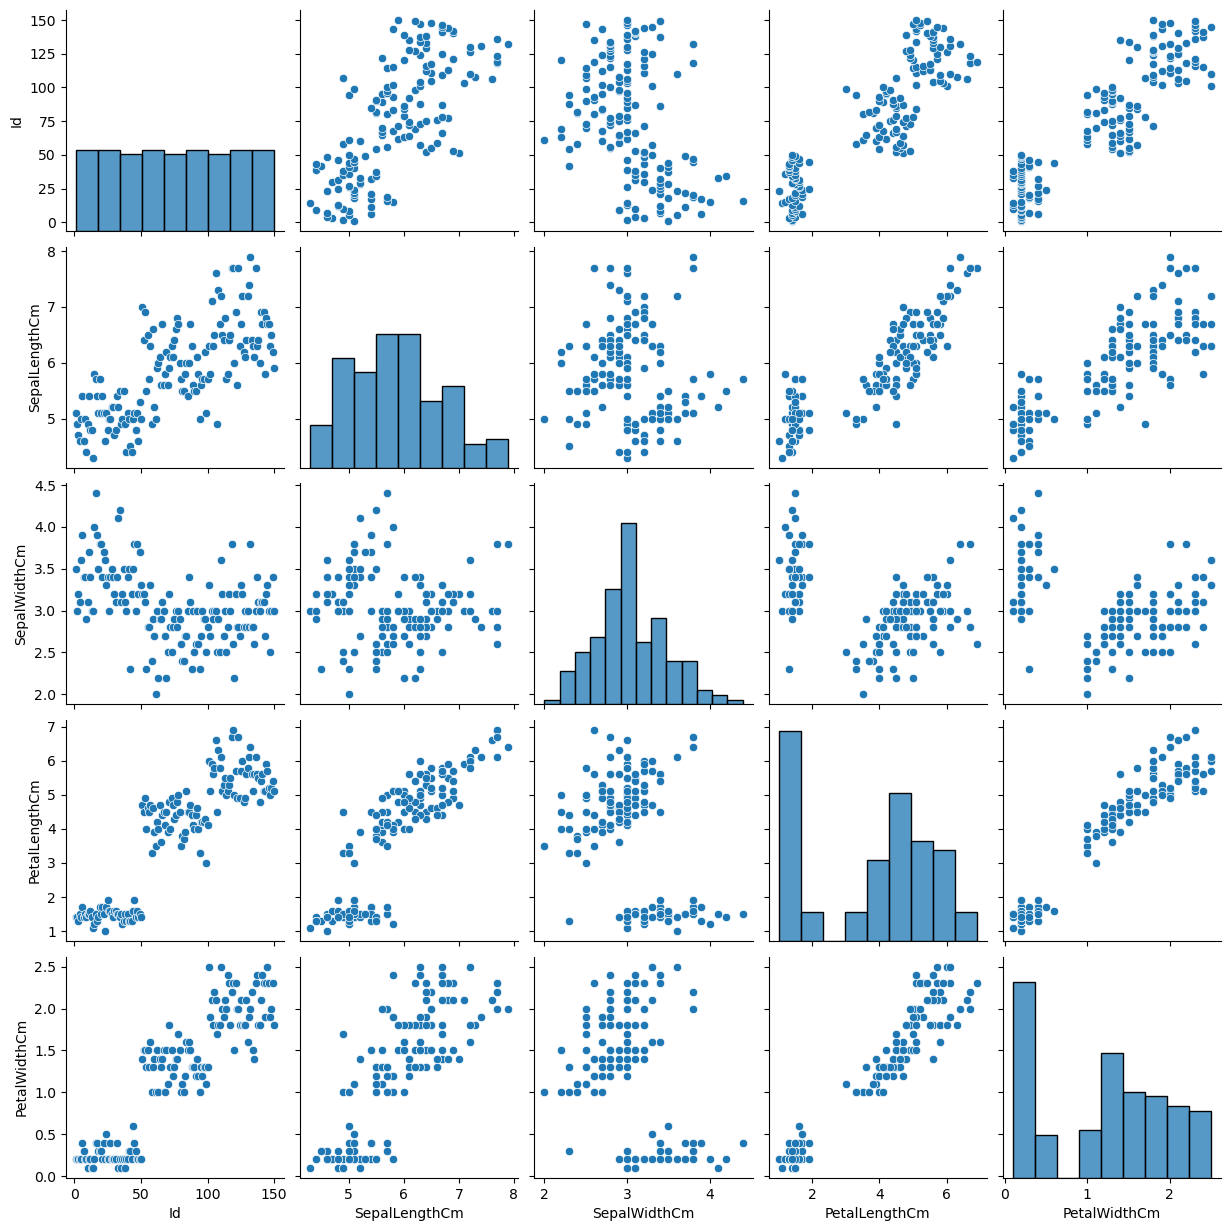

In [49]:
sns.pairplot(df)
plt.show()

In [50]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

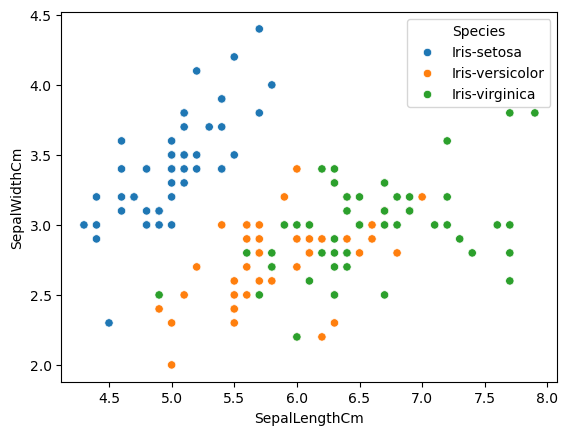

In [51]:
sns.scatterplot(x=df["SepalLengthCm"], y=df["SepalWidthCm"], hue=df["Species"])
plt.show()

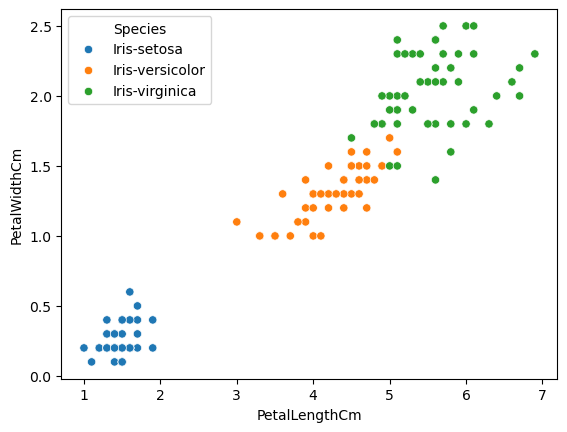

In [52]:
sns.scatterplot(x=df["PetalLengthCm"], y=df["PetalWidthCm"], hue=df["Species"])
plt.show()

In [53]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
df=df.drop("Id", axis=1)

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
label_encoder=LabelEncoder()
df["Species"]= label_encoder.fit_transform(df["Species"])

In [57]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [58]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [59]:
df["Species"].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [60]:
X=df.drop("Species", axis=1)
y=df["Species"]

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=15)

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [65]:
from sklearn.naive_bayes import GaussianNB

In [66]:
gnb= GaussianNB()

In [67]:
gnb.fit(X_train_scaled, y_train)
y_pred_gnb=gnb.predict(X_test_scaled)

In [68]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [69]:
print("confusion matrix: \n", confusion_matrix(y_test, y_pred_gnb))
print("accuracy score: ", accuracy_score(y_test, y_pred_gnb))
print("classification report: ", classification_report(y_test, y_pred_gnb))

confusion matrix: 
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]
accuracy score:  1.0
classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [70]:
from sklearn.linear_model import LogisticRegression
logistic= LogisticRegression(max_iter=1000, random_state=15)
logistic.fit(X_train_scaled, y_train)
y_pred_lg=logistic.predict(X_test_scaled)

In [71]:
print("Logistic Accuracy:", accuracy_score(y_test, y_pred_lg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lg))
print("Classification Report:\n", classification_report(y_test, y_pred_lg))

Logistic Accuracy: 1.0
Confusion Matrix:
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [72]:
from sklearn.svm import SVC
svm= SVC(kernel='rbf',C=1.0, random_state=15)
svm.fit(X_train_scaled, y_train)
y_pred_svm= svm.predict(X_test_scaled)

In [73]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 1.0
Confusion Matrix:
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [80]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'C':[0.1, 1, 10],
    'kernel':['rbf','linear','poly','sigmoid'],
    'gamma':[1, 0.1, 0.01]
}
grid=GridSearchCV(SVC(),param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             verbose=2)

In [81]:
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Best Score: 0.9640316205533598


In [84]:
models = ['GaussianNB', 'LogisticRegression', 'SVM']
y_preds = [y_pred_gnb, y_pred_lg, y_pred_svm]

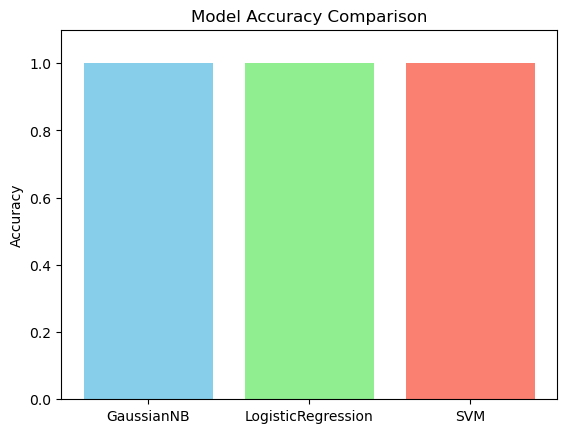

In [85]:
accuracies = [accuracy_score(y_test, y_pred) for y_pred in y_preds]
plt.bar(models, accuracies, color=['skyblue','lightgreen','salmon'])
plt.ylim(0,1.1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

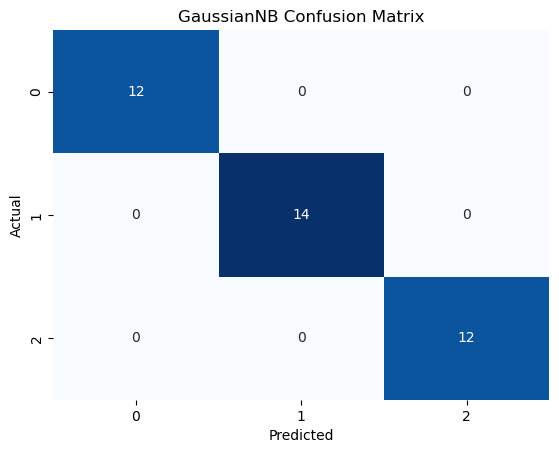

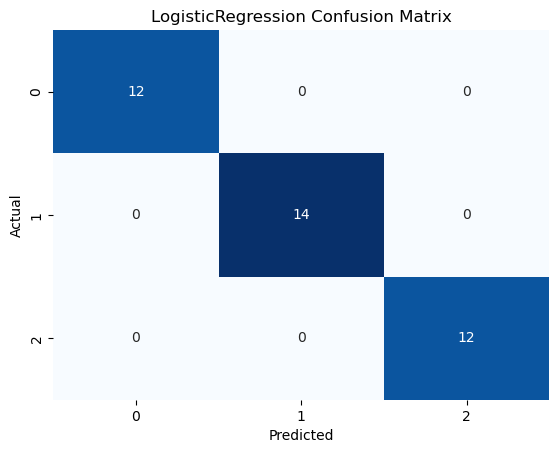

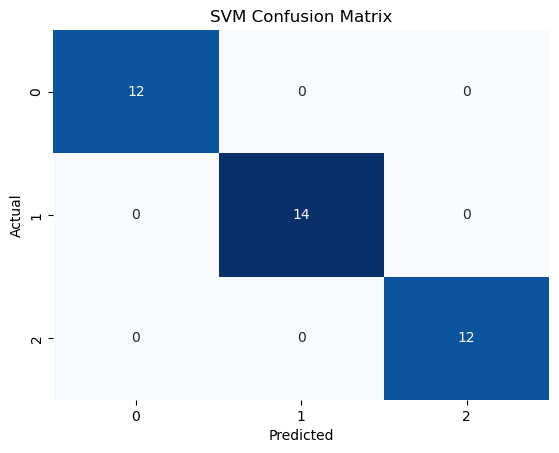

In [86]:
for model, y_pred in zip(models, y_preds):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{model} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()